<a href="https://colab.research.google.com/github/chris-lovejoy/MLmedics/blob/master/Predicting_No_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Hospital No-Shows using neural networks

*Note: A text description accompanying this notebook, describing the process and rationale step-by-step, is available [here](https://chrislovejoy.me/no-shows/).*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
ls

Breast_cancer_features.ipynb  Predicting_No_Shows.ipynb
KaggleV2-May-2016.csv         README.md


In [3]:
# cd ../

In [4]:
noShows = pd.read_csv('KaggleV2-May-2016.csv')

In [5]:
noShows.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# Correcting a few spelling errors in the original table

noShows.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)



In [7]:
noShows.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
noShows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Tidying the table by dropping useless columns

noShows.drop('PatientId', axis=1, inplace = True)
noShows.drop('AppointmentID', axis=1, inplace = True)

In [10]:
noShows['No-show'] = noShows['No-show'].map({'Yes':1, 'No':0})

noShows['Gender'] = noShows['Gender'].map({'F':1, 'M':0})


In [11]:
# Checking for NaNs and outliers

print('Age:',sorted(noShows.Age.unique()))
print('Gender:',noShows.Gender.unique())
print('Diabetes:',noShows.Diabetes.unique())
print('Alchoholism:',noShows.Alcoholism.unique())
print('Hypertension:',noShows.Hypertension.unique())
print('Handicap:',noShows.Handicap.unique())
print('Scholarship:',noShows.Scholarship.unique())
print('SMS_received:',noShows.SMS_received.unique())
print('Neighbourhood:',noShows.Neighbourhood.unique())



Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: [1 0]
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO 

In [12]:
print(noShows.AppointmentDay.head())

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object


In [13]:
type(noShows.AppointmentDay[0])

str

In [14]:
# We're only interested in the date, and not the time of day, so we'll remove the time with the below:
noShows.ScheduledDay = noShows.ScheduledDay.apply(np.datetime64)
noShows['ScheduledDay'] = noShows['ScheduledDay'].dt.date


In [15]:
# Converting date columns into datetime64 datatype

noShows.AppointmentDay = noShows.AppointmentDay.apply(np.datetime64)
noShows.ScheduledDay = noShows.ScheduledDay.apply(np.datetime64)

In [16]:
noShows.head()

# Note: the timepoints for 'AppointmentDay' have all dissapeared, as they were set exactly to 00:00:00

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


## Adding a column for 'Waiting Time'

In [17]:
noShows['WaitingTime'] = pd.to_timedelta((noShows['AppointmentDay'] - noShows['ScheduledDay'])).dt.days
noShows['WaitingTime'] = noShows['WaitingTime'].apply(np.int64)


In [18]:
noShows.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingTime
110522,1,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,35
110523,1,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,35
110524,1,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,41
110525,1,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,41
110526,1,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,0,41


# OPTIONAL: Creating dummy variables for Neighbourhoud

In [19]:
dummy_cols = ['Neighbourhood']
noShows = pd.get_dummies(noShows, columns = dummy_cols)

In [20]:
noShows.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,1,2016-04-29,2016-04-29,62,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2016-04-29,2016-04-29,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2016-04-29,2016-04-29,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2016-04-29,2016-04-29,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2016-04-29,2016-04-29,56,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Developing the model

In [21]:
prediction_var = ['Gender','Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','WaitingTime']


In [22]:
 from sklearn.model_selection import train_test_split
 
 train, test = train_test_split(noShows, test_size = 0.15)


In [23]:
train_x = train[prediction_var]
train_y = train['No-show']

test_x = test[prediction_var]
test_y = test['No-show']


In [24]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))


In [25]:
model.fit(train_x, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

In [26]:
# prediction = model.predict(test_x)

prediction = model.predict_proba(test_x)
proba_predict = prediction[:,1]

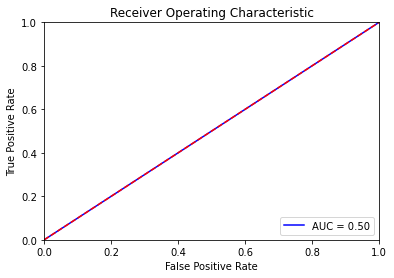

In [27]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_y, proba_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# Alternative classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
model = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=1, min_samples_split=5, random_state=0, verbose=0)
# model = SVC(kernel='rbf', gamma=’auto’, max_iter=-1)
# model =  MultinomialNB()

In [29]:
model.fit(train_x, train_y)

RandomForestClassifier(max_depth=2, min_samples_split=5, random_state=0)

In [30]:
# prediction = model.predict(test_x)

prediction = model.predict_proba(test_x)
proba_predict = prediction[:,1]

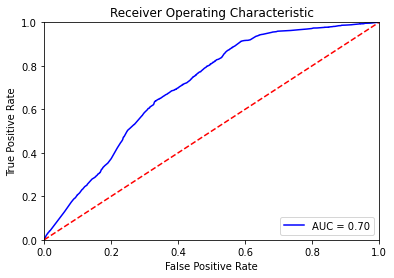

In [31]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_y, proba_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()